<a href="https://colab.research.google.com/github/ahinsa2001/Seeds-Classification_ML_Assignment/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Reading Dataset

In [ ]:
file_path = '/content/sample_data/seeds_dataset.txt'

# Load the tab-separated text file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'class'])

In [ ]:
# Display basic information about the loaded DataFrame
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.tail()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


# Analyzing the Data

In [ ]:
# Shape of the Data
df.shape

(210, 8)

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


Description of the data

In [ ]:
# describing the data
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Checking Columns

In [ ]:
#column to list
df.columns.tolist()

['Area',
 'Perimeter',
 'Compactness',
 'Length of kernel',
 'Width of kernel',
 'Asymmetry coefficient',
 'Length of kernel groove',
 'class']

Checking Missing Values

In [ ]:
# check for missing values:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
class                      0
dtype: int64

Checking for the duplicate values

In [ ]:
#checking duplicate values
df.nunique()

Area                       193
Perimeter                  170
Compactness                186
Length of kernel           188
Width of kernel            184
Asymmetry coefficient      207
Length of kernel groove    148
class                        3
dtype: int64

# Univariate Analysis

Count plots

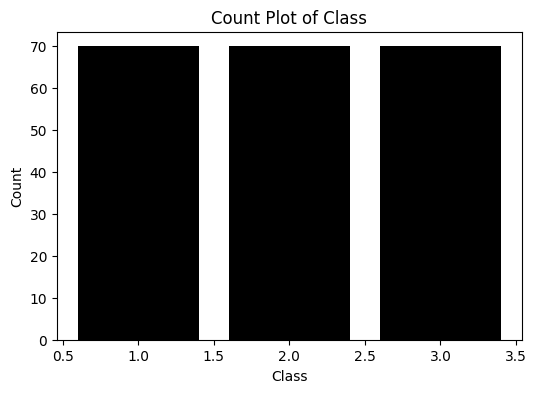

In [ ]:
# Check class distribution
class_counts = df['class'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts, color='black')
plt.title('Count Plot of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Kernel Density Plots

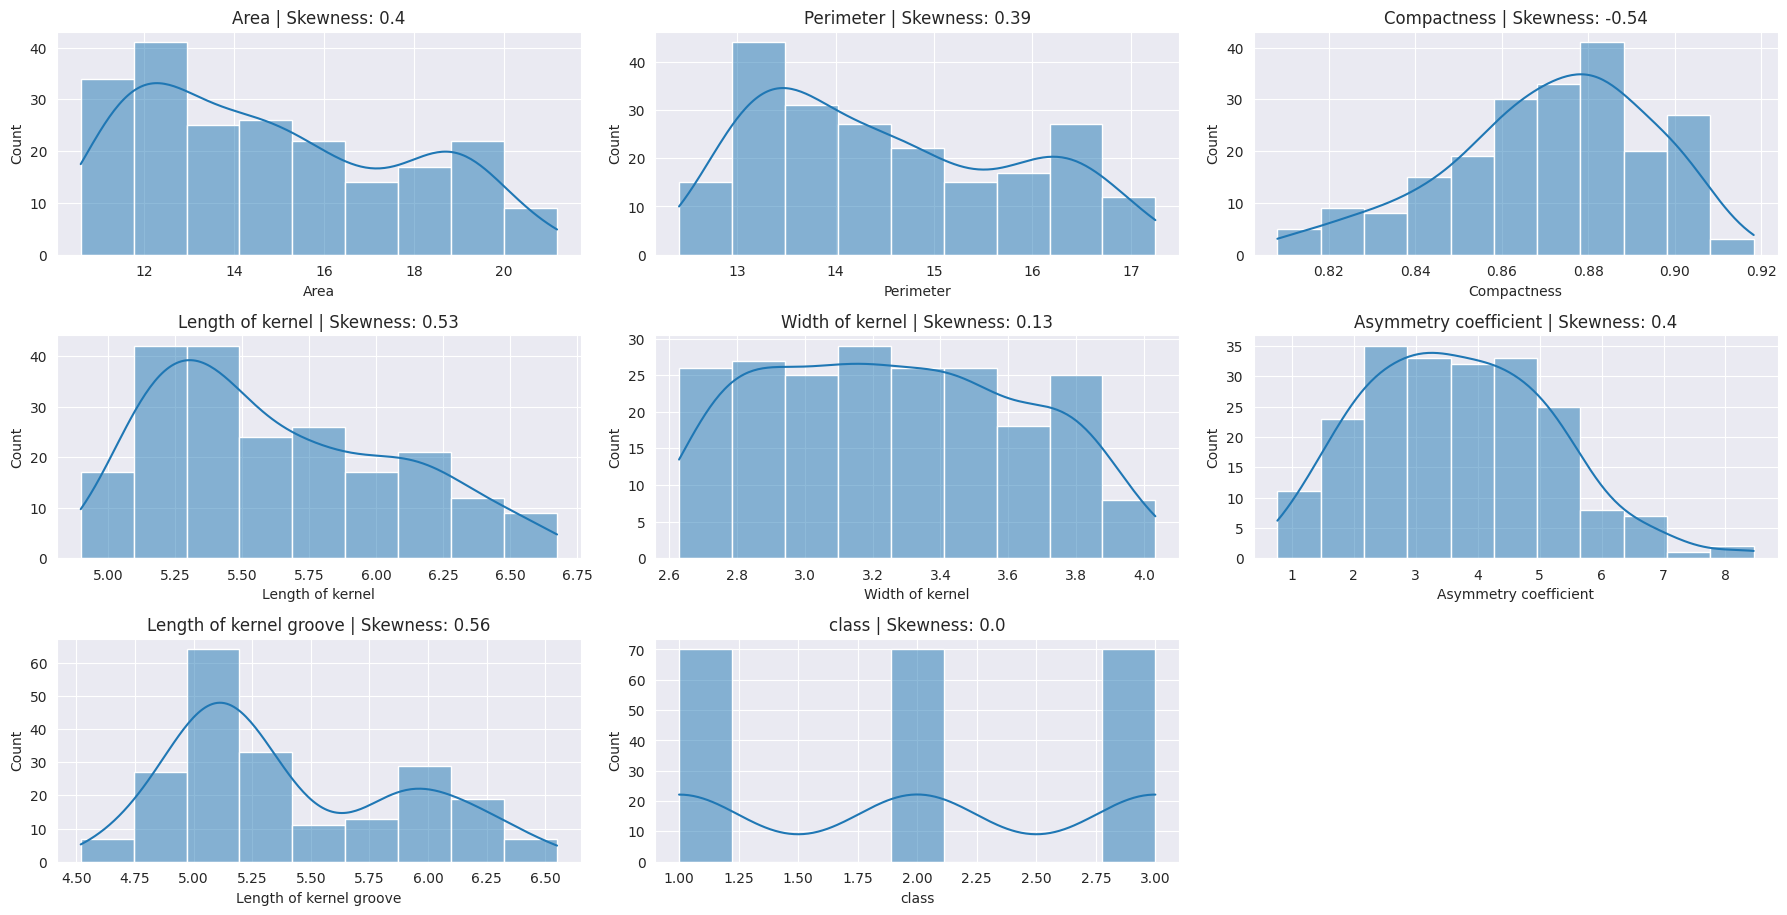

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(18, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Design and Develop the ANN model:

In [ ]:
# Prepare data
X = df.drop('class', axis=1).values
y = df['class'].values - 1

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) #70% traning 30% validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #30% above 50% validation and 50% testing

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons, number of features =1-, activation function relu
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(3, activation='sigmoid'))  # Output layer with sigmoid activation

# *Train model at learning_rate=0.001*

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
5/5 [==============================] - 2s 166ms/step - loss: 3.4505 - accuracy: 0.3265 - val_loss: 3.0782 - val_accuracy: 0.3226
Epoch 2/20
5/5 [==============================] - 0s 35ms/step - loss: 2.0920 - accuracy: 0.3061 - val_loss: 1.9865 - val_accuracy: 0.1935
Epoch 3/20
5/5 [==============================] - 0s 38ms/step - loss: 1.3731 - accuracy: 0.3401 - val_loss: 1.1813 - val_accuracy: 0.2258
Epoch 4/20
5/5 [==============================] - 0s 56ms/step - loss: 1.1743 - accuracy: 0.2993 - val_loss: 1.0525 - val_accuracy: 0.4839
Epoch 5/20
5/5 [==============================] - 0s 37ms/step - loss: 1.2038 - accuracy: 0.3333 - val_loss: 1.0048 - val_accuracy: 0.4839
Epoch 6/20
5/5 [==============================] - 0s 50ms/step - loss: 1.1090 - accuracy: 0.3741 - val_loss: 1.0486 - val_accuracy: 0.4516
Epoch 7/20
5/5 [==============================] - 0s 52ms/step - loss: 1.0451 - accuracy: 0.5714 - val_loss: 1.0752 - val_accuracy: 0.4839
Epoch 8/20
5/5 [==========

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


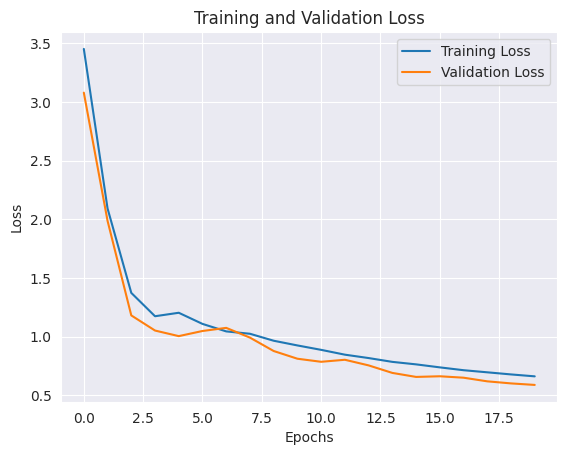

In [ ]:
# Plot the training and validation loss
print(history.history.keys())
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


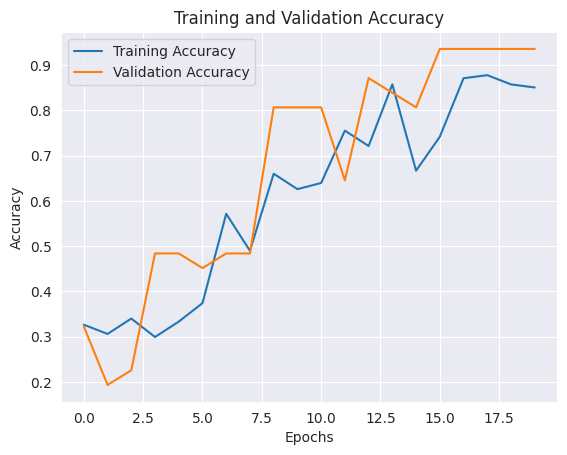

In [ ]:
# Plot the training and validation accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

1/1 [==============================] - 0s 72ms/step - loss: 0.7212 - accuracy: 0.7812
Test Accuracy: 0.78125
Test Loss: 0.7212035655975342


# *Train model at learning_rate=0.01*

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
5/5 [==============================] - 1s 99ms/step - loss: 1.4491 - accuracy: 0.5034 - val_loss: 0.6207 - val_accuracy: 0.7419
Epoch 2/20
5/5 [==============================] - 0s 21ms/step - loss: 0.7399 - accuracy: 0.6327 - val_loss: 0.4788 - val_accuracy: 0.8065
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.7330 - accuracy: 0.6667 - val_loss: 0.7884 - val_accuracy: 0.5161
Epoch 4/20
5/5 [==============================] - 0s 27ms/step - loss: 0.5795 - accuracy: 0.7143 - val_loss: 0.4062 - val_accuracy: 0.7742
Epoch 5/20
5/5 [==============================] - 0s 31ms/step - loss: 0.5030 - accuracy: 0.7755 - val_loss: 0.4416 - val_accuracy: 0.8710
Epoch 6/20
5/5 [==============================] - 0s 60ms/step - loss: 0.4687 - accuracy: 0.8639 - val_loss: 0.3459 - val_accuracy: 0.9355
Epoch 7/20
5/5 [==============================] - 0s 43ms/step - loss: 0.4217 - accuracy: 0.8435 - val_loss: 0.2807 - val_accuracy: 0.9032
Epoch 8/20
5/5 [===========

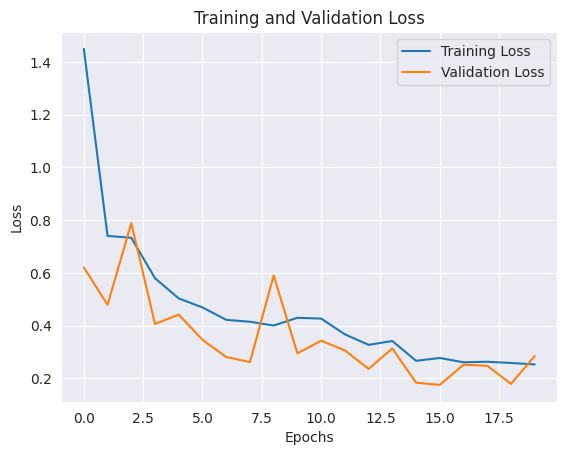

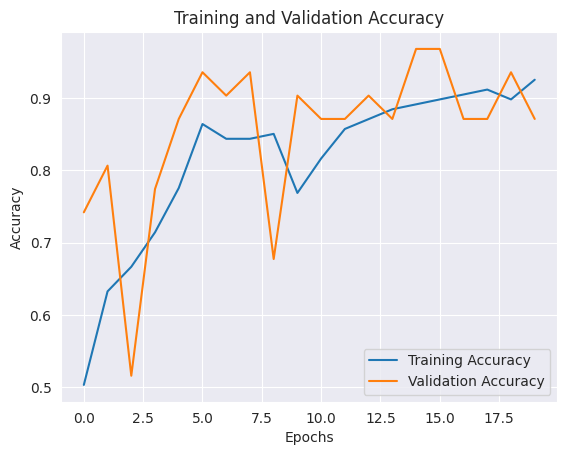

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

1/1 [==============================] - 0s 28ms/step - loss: 0.3796 - accuracy: 0.8125
Test Accuracy: 0.8125
Test Loss: 0.3795933723449707


# **Test different configurations**

1/1 [==============================] - 0s 33ms/step - loss: 0.3578 - accuracy: 0.8125
Configuration: Layers=64, LR=0.001, Optimizer=adam, Test Accuracy: 0.8125


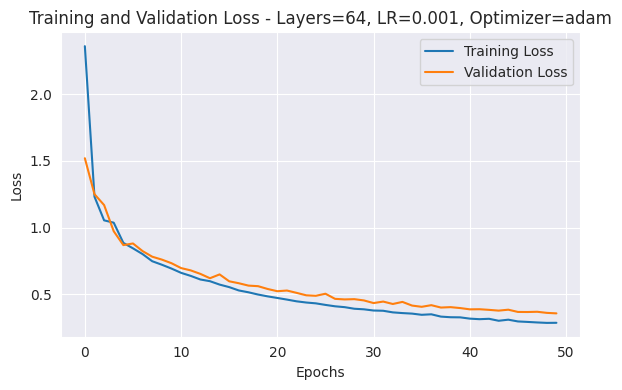

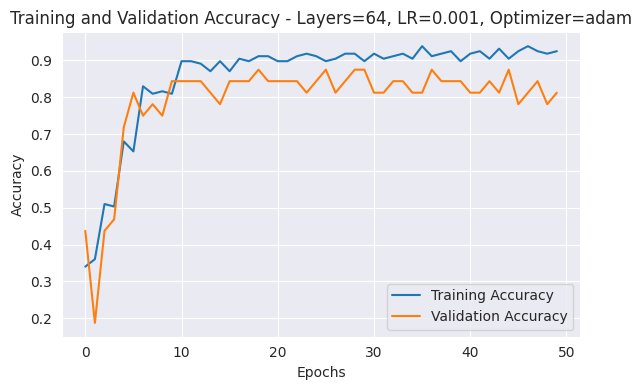


1/1 [==============================] - 0s 29ms/step - loss: 0.4691 - accuracy: 0.8125
Configuration: Layers=64, LR=0.001, Optimizer=sgd, Test Accuracy: 0.8125


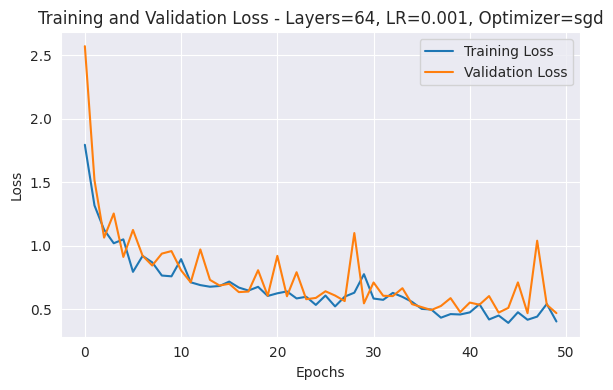

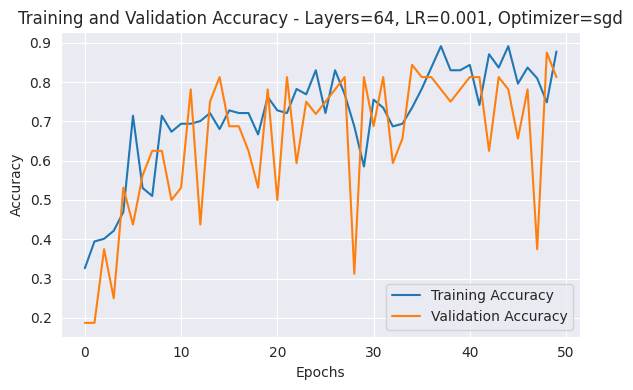


1/1 [==============================] - 0s 43ms/step - loss: 0.4046 - accuracy: 0.7812
Configuration: Layers=64, LR=0.001, Optimizer=rmsprop, Test Accuracy: 0.78125


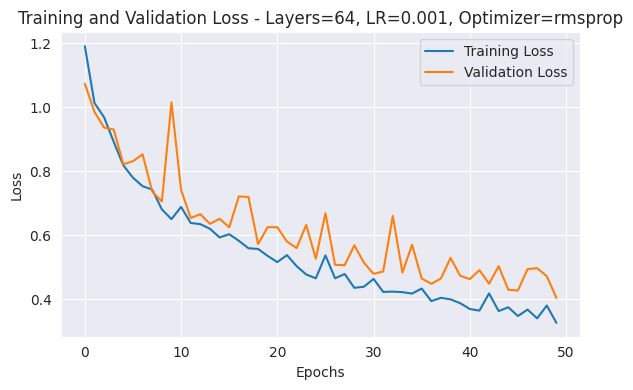

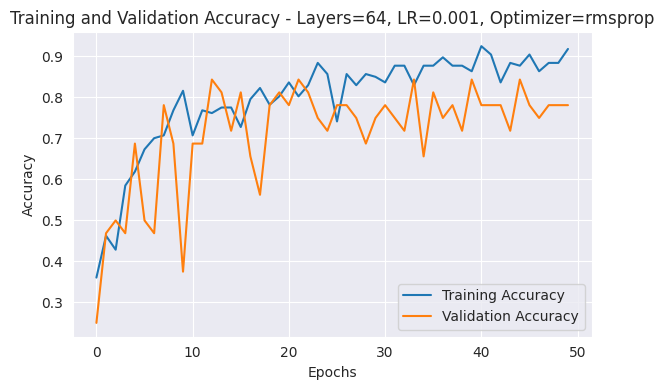


1/1 [==============================] - 0s 26ms/step - loss: 0.3704 - accuracy: 0.8438
Configuration: Layers=64, LR=0.01, Optimizer=adam, Test Accuracy: 0.84375


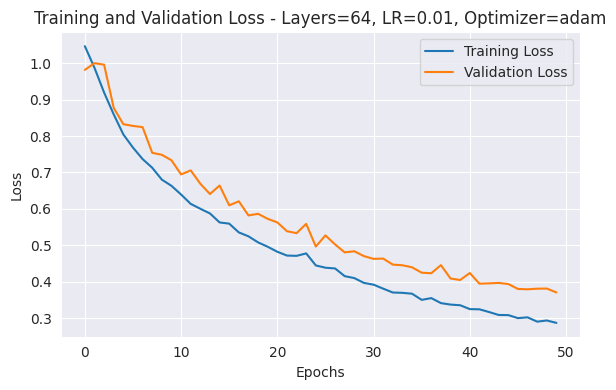

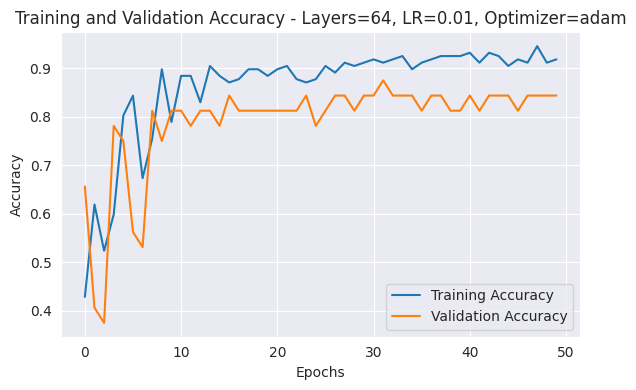


1/1 [==============================] - 0s 32ms/step - loss: 0.5305 - accuracy: 0.8438
Configuration: Layers=64, LR=0.01, Optimizer=sgd, Test Accuracy: 0.84375


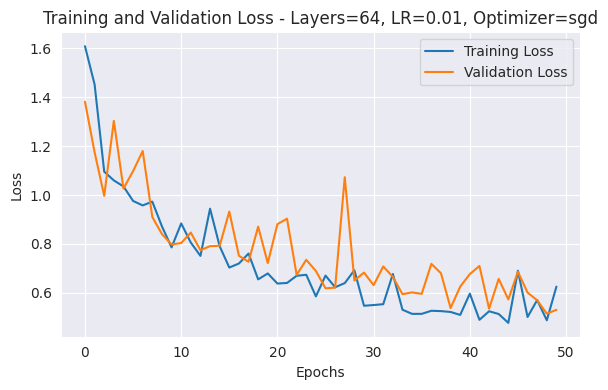

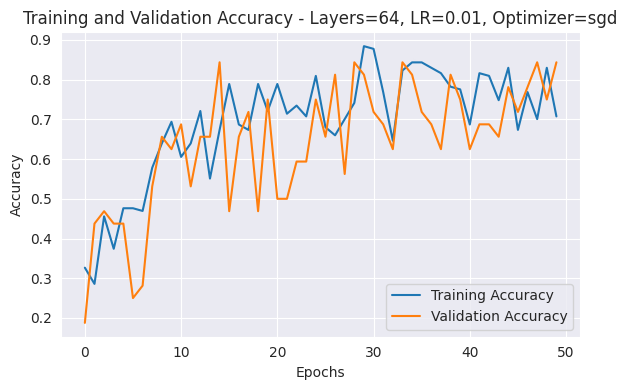


1/1 [==============================] - 0s 27ms/step - loss: 0.4328 - accuracy: 0.8125
Configuration: Layers=64, LR=0.01, Optimizer=rmsprop, Test Accuracy: 0.8125


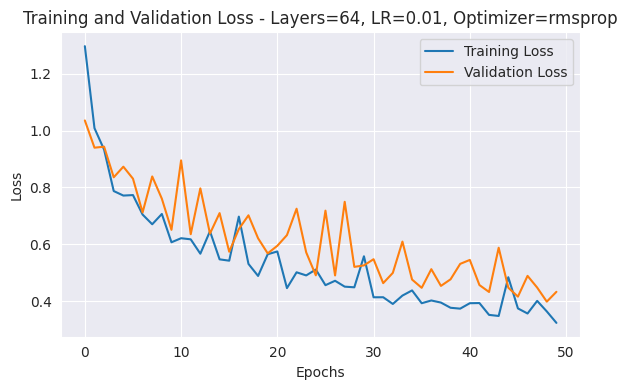

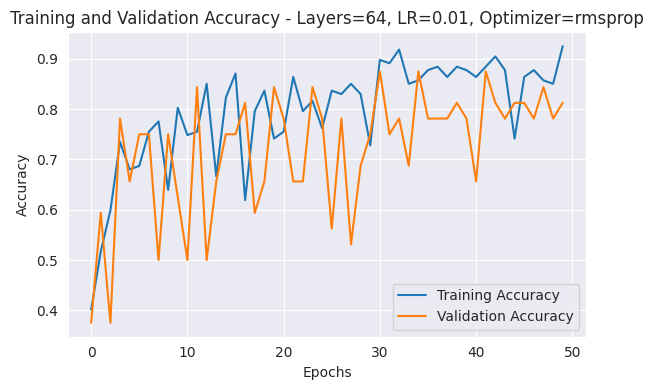


1/1 [==============================] - 0s 34ms/step - loss: 0.3834 - accuracy: 0.8438
Configuration: Layers=64, LR=0.1, Optimizer=adam, Test Accuracy: 0.84375


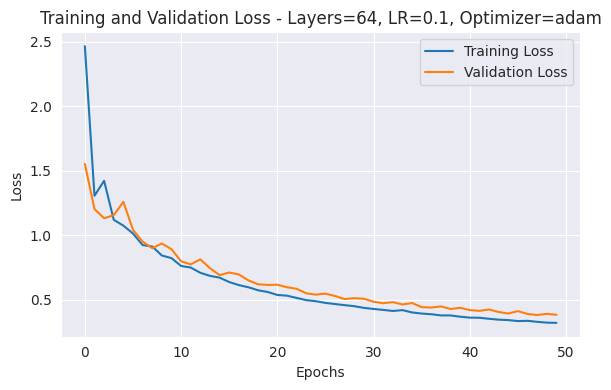

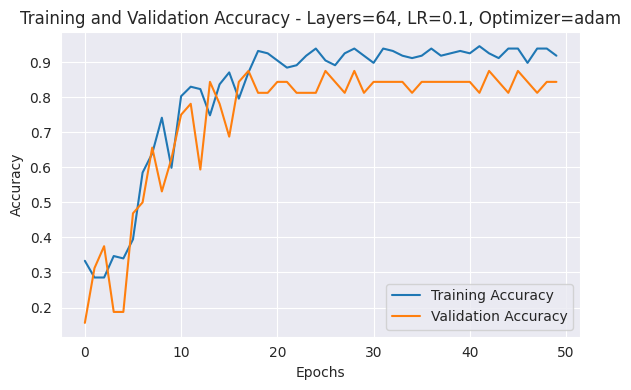


1/1 [==============================] - 0s 40ms/step - loss: 0.5477 - accuracy: 0.6875
Configuration: Layers=64, LR=0.1, Optimizer=sgd, Test Accuracy: 0.6875


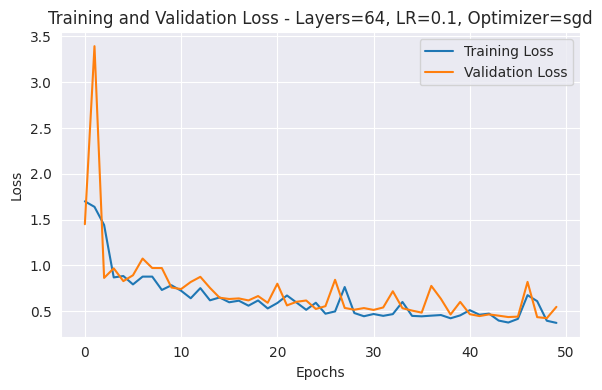

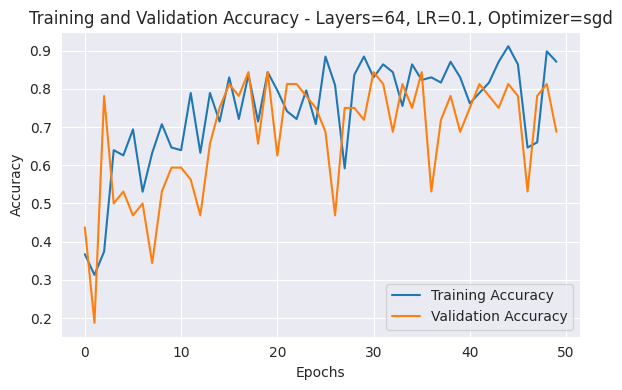


1/1 [==============================] - 0s 31ms/step - loss: 0.4436 - accuracy: 0.7812
Configuration: Layers=64, LR=0.1, Optimizer=rmsprop, Test Accuracy: 0.78125


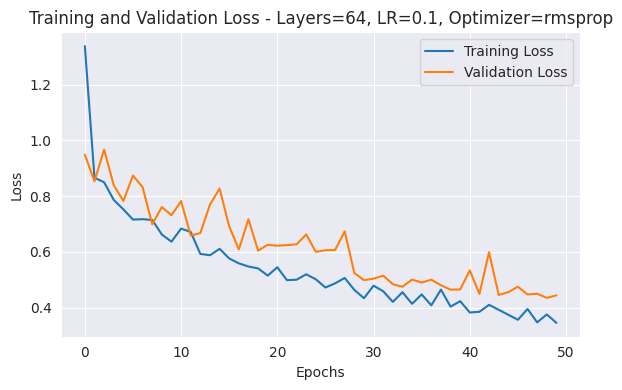

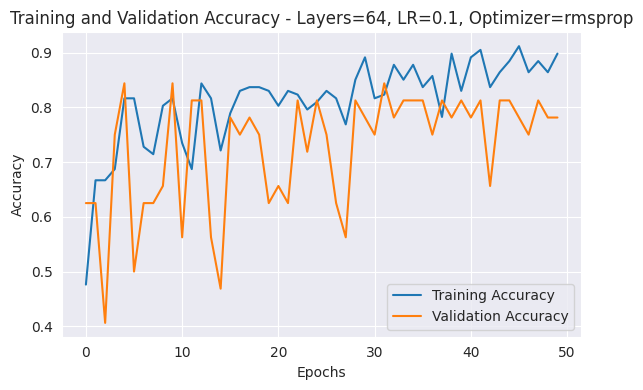


1/1 [==============================] - 0s 25ms/step - loss: 0.5451 - accuracy: 0.8750
Configuration: Layers=32, LR=0.001, Optimizer=adam, Test Accuracy: 0.875


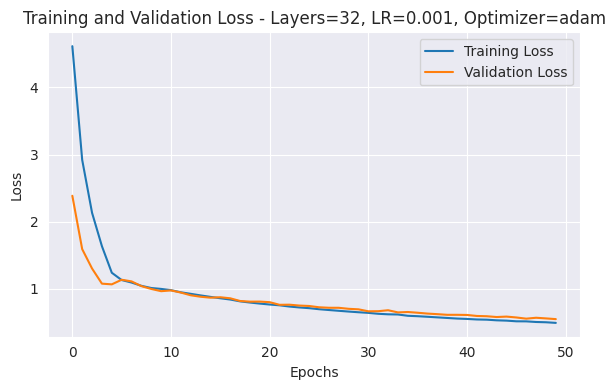

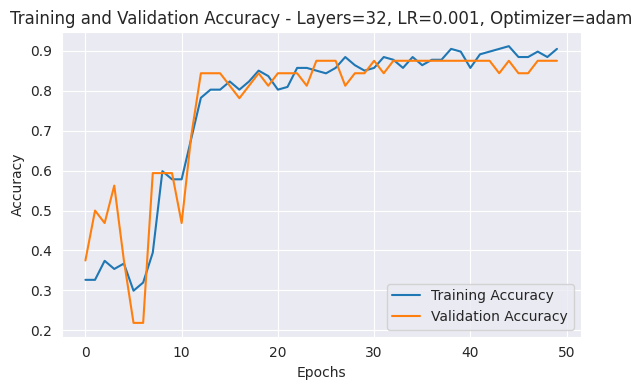


1/1 [==============================] - 0s 30ms/step - loss: 0.5348 - accuracy: 0.7500
Configuration: Layers=32, LR=0.001, Optimizer=sgd, Test Accuracy: 0.75


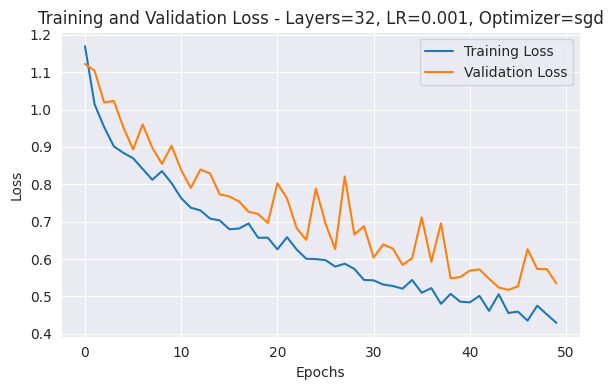

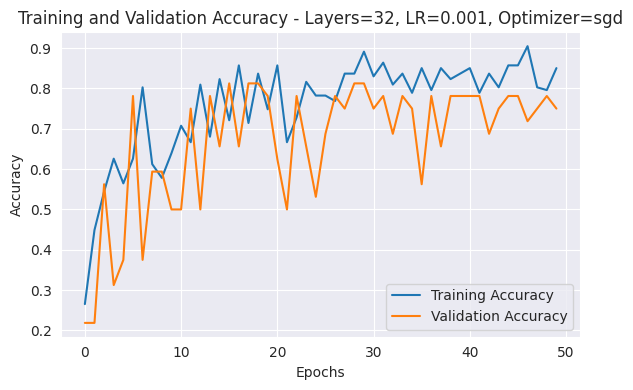


1/1 [==============================] - 0s 27ms/step - loss: 0.6509 - accuracy: 0.8438
Configuration: Layers=32, LR=0.001, Optimizer=rmsprop, Test Accuracy: 0.84375


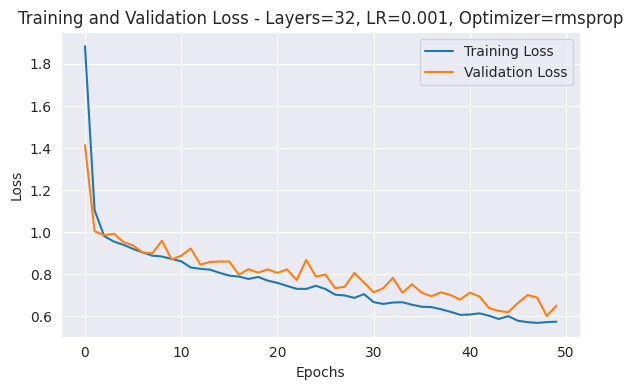

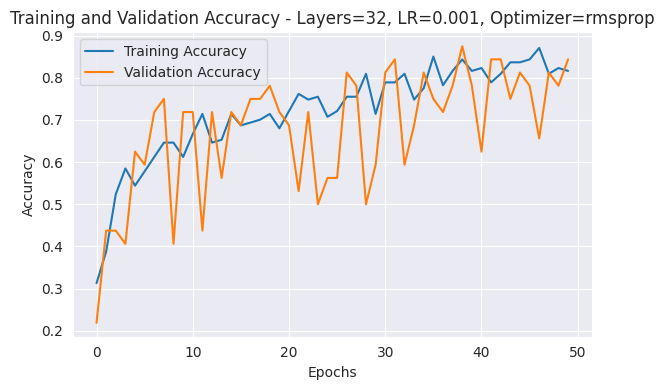


1/1 [==============================] - 0s 32ms/step - loss: 0.4952 - accuracy: 0.8438
Configuration: Layers=32, LR=0.01, Optimizer=adam, Test Accuracy: 0.84375


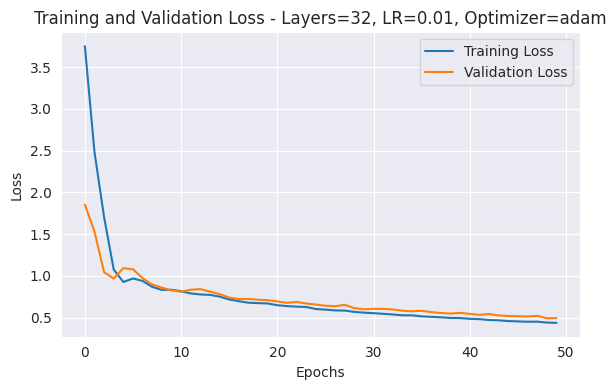

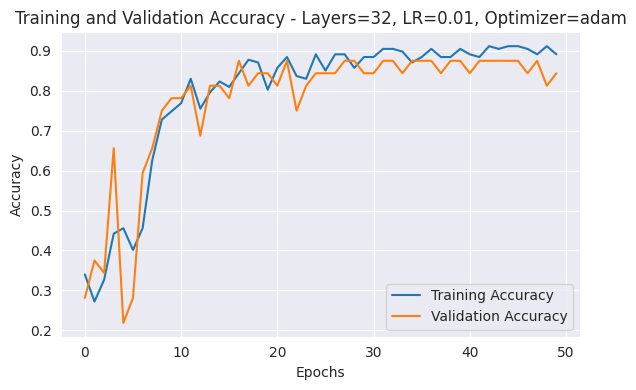


1/1 [==============================] - 0s 28ms/step - loss: 0.6003 - accuracy: 0.6875
Configuration: Layers=32, LR=0.01, Optimizer=sgd, Test Accuracy: 0.6875


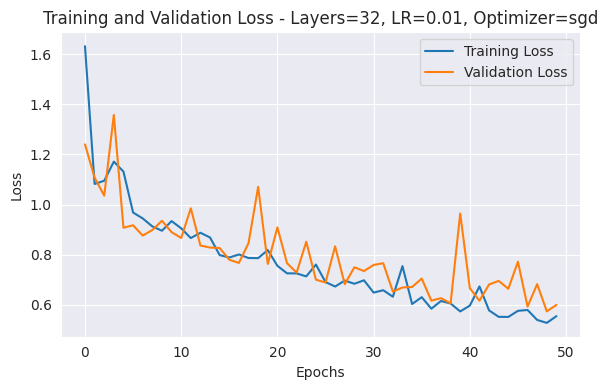

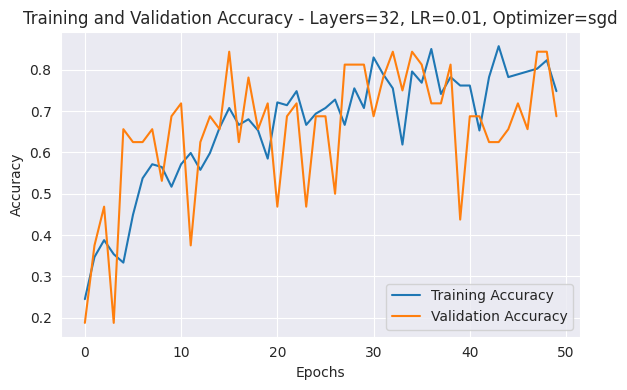


1/1 [==============================] - 0s 25ms/step - loss: 0.4992 - accuracy: 0.8438
Configuration: Layers=32, LR=0.01, Optimizer=rmsprop, Test Accuracy: 0.84375


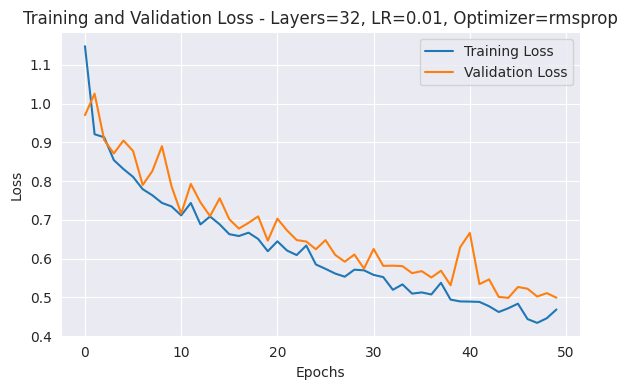

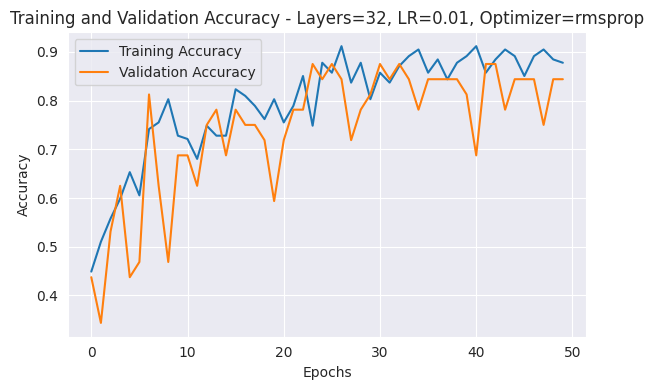


1/1 [==============================] - 0s 29ms/step - loss: 0.6785 - accuracy: 0.8438
Configuration: Layers=32, LR=0.1, Optimizer=adam, Test Accuracy: 0.84375


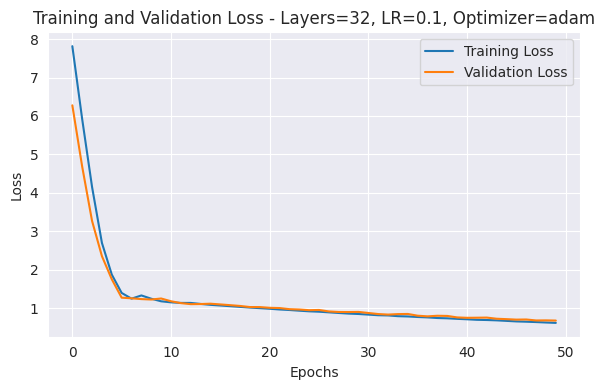

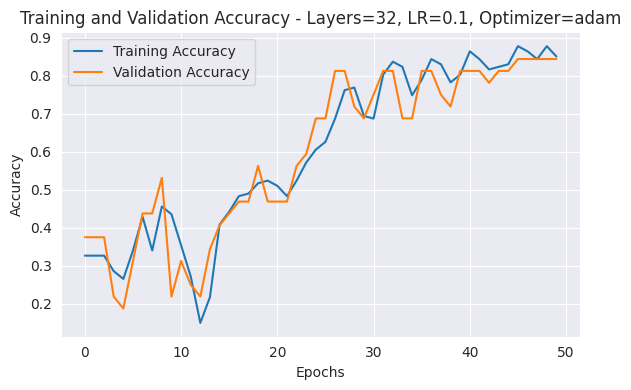


1/1 [==============================] - 0s 43ms/step - loss: 0.5763 - accuracy: 0.7812
Configuration: Layers=32, LR=0.1, Optimizer=sgd, Test Accuracy: 0.78125


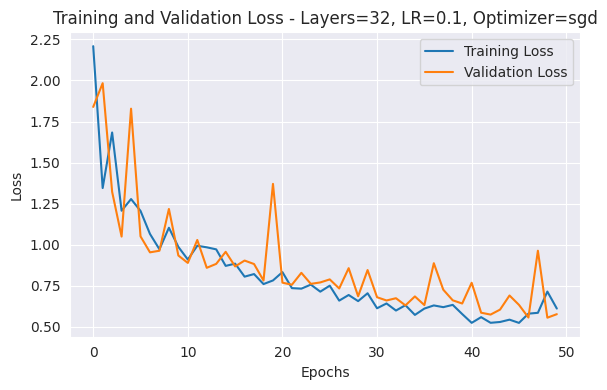

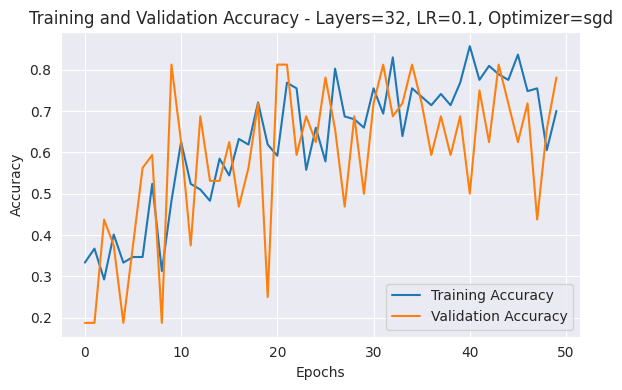


1/1 [==============================] - 0s 29ms/step - loss: 0.5438 - accuracy: 0.7812
Configuration: Layers=32, LR=0.1, Optimizer=rmsprop, Test Accuracy: 0.78125


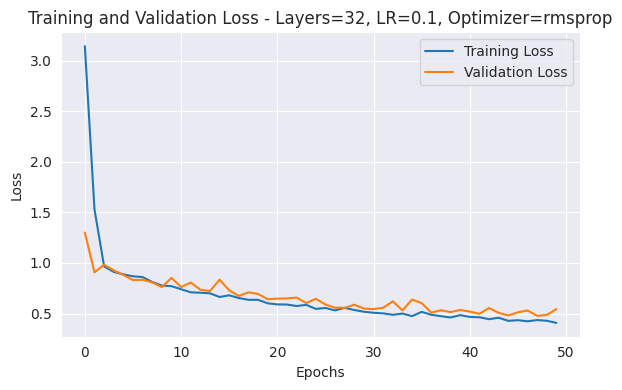

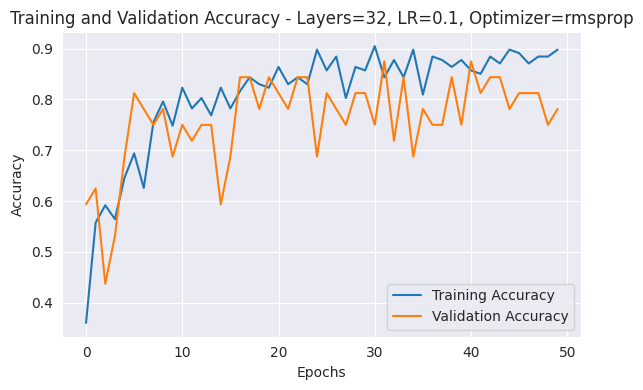

In [ ]:
layer_configs = [64, 32]
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['adam', 'sgd', 'rmsprop']

results = []

for layer_config in layer_configs:
    for learning_rate in learning_rates:
        for optimizer in optimizers:
            # Define and compile the ANN model
            model = Sequential()
            model.add(Dense(units=layer_config, activation='relu', input_dim=X_train.shape[1]))
            model.add(Dense(units=layer_config, activation='relu'))
            model.add(Dense(units=3, activation='softmax'))

            # Compile the model
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

            # Evaluate the model
            test_loss, test_acc = model.evaluate(X_test, y_test)
            print(f'Configuration: Layers={layer_config}, LR={learning_rate}, Optimizer={optimizer}, Test Accuracy: {test_acc}')

            # Plot the training and validation loss
            plt.figure(figsize=(6, 4))
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f'Training and Validation Loss - Layers={layer_config}, LR={learning_rate}, Optimizer={optimizer}')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.tight_layout()
            plt.show()

            # Plot the training and validation accuracy
            plt.figure(figsize=(6, 4))
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title(f'Training and Validation Accuracy - Layers={layer_config}, LR={learning_rate}, Optimizer={optimizer}')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.tight_layout()
            plt.show()
            print()


In [37]:
# Save the entire model to a file
model.save('ML_Assignment(D_BCE_21_0015).keras')